Title: Netflix Data Analysis and Genre-Related Insights
Objective

The primary goal of this notebook is to explore:

    1.) The number of distinct genres across movies and series
    2.) The relationship between genre and runtime, analyzing statistical significance
    3.) The relationship between genre and IMDb Votes, analyzing statistical significance

In [ ]:
import importlib
import seaborn as sns

from typing import Type, Any

from data_processor import DataProcessor
from data_transformer import DataTransformer
from data_visualizer import DataVisualizer
from data_stats import DataStats


In [ ]:
def load_class(module_name: str, class_name: str) -> Type[Any]:
    module = importlib.import_module(module_name)
    return getattr(module, class_name)

In [ ]:
DataProcessor = load_class('data_processor', 'DataProcessor')
DataTransformer = load_class('data_transformer', 'DataTransformer')

In [ ]:
processor = DataProcessor('dataset_converted.csv')
processor.load_data()

transformer = DataTransformer(processor)

df_copy = transformer.make_df_copy()
print(df_copy.head())

Error loading cache file: resetting cache
Data loaded and stored in cahce
Copy of dataset successfully created
                 Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2     The Con-Heartist                         Comedy, Romance   
3         Gleboka woda                                   Drama   
4        Only a Mother                                   Drama   

                                                Tags         Languages  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   
1       Dramas,Comedies,Films Based on Books,British           English   
2  Romantic Comedies,Comedies,Romantic Films,Thai...              Thai   
3   TV Dramas,Polish TV Shows,Social Issue TV Dramas            Polish   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Swedish   

  Series or Movie  Hidden Gem Score  \
0       

1. How many distinct genres are there in both movies and series?

In [ ]:
df_copy = transformer.standardize_text(df_copy, 'Genre')
df_copy = transformer.fill_missing_values(df_copy, 'Genre', 'None Stated')
df_copy = transformer.split_str(df_copy, 'Genre')
genre_group = transformer.make_group(df_copy, 'Genre_list')

DataVisualizer = load_class('data_visualizer', 'DataVisualizer')
visualizer = DataVisualizer('./insurance')
print(genre_group)


🔹 Before Splitting: 0    crime, drama, fantasy, horror, romance
1                                    comedy
2                           comedy, romance
3                                     drama
4                                     drama
Name: Genre, dtype: object

✅ After Splitting: 0    [Crime, Drama, Fantasy, Horror, Romance]
1                                    [Comedy]
2                           [Comedy, Romance]
3                                     [Drama]
4                                     [Drama]
Name: Genre_list, dtype: object
✅ Computed and cached grouped data for column 'Genre_list'
Genre_list
Drama          4803
Comedy         3305
Action         2149
Thriller       2071
Romance        1812
Crime          1512
Adventure      1355
Fantasy        1228
Animation      1173
Scifi           955
Mystery         936
Family          881
Documentary     804
Horror          717
Biography       572
History         449
Music           308
Sport           289
War             282


The columns list: ['Genre', 'Count']
Data on convert after adding columns:           Genre  Count
0         Drama   4803
1        Comedy   3305
2        Action   2149
3      Thriller   2071
4       Romance   1812
5         Crime   1512
6     Adventure   1355
7       Fantasy   1228
8     Animation   1173
9         Scifi    955
10      Mystery    936
11       Family    881
12  Documentary    804
13       Horror    717
14    Biography    572
15      History    449
16        Music    308
17        Sport    289
18          War    282
19      Musical    165
20        Short    161
21    Realitytv    111
22      Western     87
23     Gameshow     32
24  None Stated     25
25     Talkshow     17
26         News     14
27        Adult      5
28     Filmnoir      1
✅ This is a Series


C:\Users\flash\data_ai_foundations_final_project\netflix_project\data_visualizer.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot_func(data=data, x=x, y=y,palette='Blues_r', **kwargs)


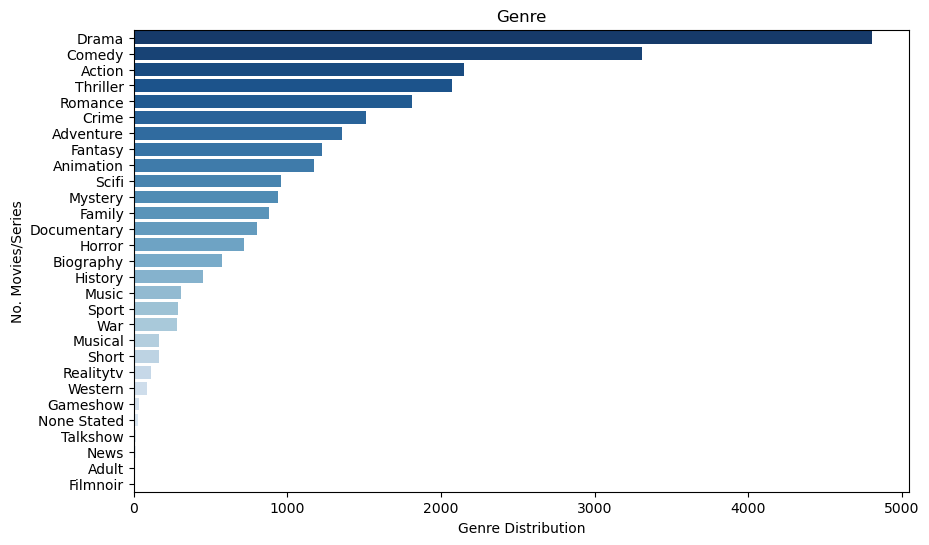

In [ ]:
visualizer.plot_any(
    data=genre_group, 
    plot_func=sns.barplot,  
    x='Count',  
    y='Genre',  
    x_label='Genre Distribution',  
    y_label='No. Movies/Series',  
    title='Genre',  
    columns=['Genre', 'Count']
)

In [ ]:
print(f'There are {len(genre_group)} distinct genres in this dataset')

There are 29 distinct genres in this dataset


2. Is there a statistical significance between genres and runtime?

In [ ]:
# df_copy = transformer.standardize_text(df_copy, 'Genre')
# df_copy = transformer.fill_missing_values(df_copy, 'Genre', 'None Stated')
# df_copy = transformer.split_str(df_copy, 'Genre')


genre_runtime_group = transformer.make_group(df_copy, 'Genre_list', 'Runtime')
print(genre_runtime_group)

✅ Returning cached grouped data for column 'Genre_list'
Runtime      1-2 hour  30-60 mins  < 30 minutes  > 2 hrs
Genre_list                                              
Action           1179          26           471      473
Adult               3           0             2        0
Adventure         759          14           352      230
Animation         446          33           666       28
Biography         322           5            55      190
Comedy           2046          59           897      302
Crime             798           4           387      323
Documentary       460          48           264       32
Drama            2476          18          1182     1127
Family            540          15           272       54
Fantasy           642          15           442      129
Filmnoir            1           0             0        0
Gameshow            0           0            32        0
History           188           2           114      145
Horror            512           

In [ ]:
from data_stats import DataStats

stats = DataStats(processor)

In [ ]:
genre_runtime_stats = stats.run_chi2_contingency(genre_runtime_group)



In [ ]:
print(f'Genre/Runtime Chi2: {genre_runtime_stats['chi2_stat']}')
print(f'Genre/Runtime P_Value: {genre_runtime_stats['p_value']}')


Genre/Runtime Chi2: 2740.0105241383
Genre/Runtime P_Value: 0.0


With the Chi2 value of 2740.01 (2dp) and p_value of 0.0, we can see that there is a statistical significance between genre and runtime. 

3.) The relationship between genre and IMDb Votes, analyzing statistical significance

In [ ]:
genre_IMDb_group = transformer.make_group(df_copy, 'Genre_list', 'IMDb Votes')

print(genre_IMDb_group.head())

✅ Returning cached grouped data for column 'Genre_list'
IMDb Votes  5.0        6.0        7.0        8.0        9.0        10.0       \
Genre_list                                                                     
Action              0          0          2          3          3          1   
Adult               0          0          1          0          0          0   
Adventure           0          0          1          1          2          3   
Animation           2          4          6          3          1          7   
Biography           0          0          0          0          0          0   

IMDb Votes  11.0       12.0       13.0       14.0       ...  1522306.0  \
Genre_list                                              ...              
Action              1          0          2          2  ...          1   
Adult               0          0          0          1  ...          0   
Adventure           0          0          0          1  ...          1   
Animation    

In [ ]:
genre_IMDb_stats = stats.run_chi2_contingency(genre_IMDb_group)

print(f'Genre/IMDb Votes Chi2: {genre_IMDb_stats['chi2_stat']}')
print(f'Genre/IMDb Votes P_Value: {genre_IMDb_stats['p_value']}')

Genre/IMDb Votes Chi2: 167354.4619265219
Genre/IMDb Votes P_Value: 1.0


With the Chi2 value of 167354.46 (2dp) and p_value of 1.0, we can see that there is no statistical significance between genre and IMDb Votes.
